Mushroom Classification using Unsupervised Learning.

We need to create an unsupervised learning algorithm that will learn how to classify mushrooms between poisonous and edible:

poisonous:  1
edible:     0


Import modules

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Read data

In [14]:
orig = pd.read_csv('mushrooms.csv')
print(orig.head())

  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color   ...   stalk-surface-below-ring  \
0            c         n          k   ...                          s   
1            c         b          k   ...                          s   
2            c         b          n   ...                          s   
3            c         n          n   ...                          s   
4            w         b          k   ...                          s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p     

Divide our data into 'predictors,' X and 'labels,' y:

In [15]:
#The 'class' column contains our labels.
#It tells us whether the mushroom is 'poisonous' or 'edible'.
X = orig.drop(['class'], axis=1)
y = orig['class']

EDA: Exploration Data Analysis

In [16]:
for attr in X.columns:
    print("\n*", attr, "*")
    print(X[attr].value_counts())


* cap-shape *
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

* cap-surface *
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

* cap-color *
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

* bruises *
f    4748
t    3376
Name: bruises, dtype: int64

* odor *
n    3528
f    2160
y     576
s     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64

* gill-attachment *
f    7914
a     210
Name: gill-attachment, dtype: int64

* gill-spacing *
c    6812
w    1312
Name: gill-spacing, dtype: int64

* gill-size *
b    5612
n    2512
Name: gill-size, dtype: int64

* gill-color *
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64

* stalk-shape *
t    4608
e    3516
Name: stalk-shape, dtype: int64

* stalk-root *
b    3776


All the values in the column: veil-type has the same value "p". So, that column does not tell us anything useful.

In [17]:
X.drop(['veil-type'], axis=1, inplace=True)

In [12]:
print(X)

     cap-shape cap-surface cap-color bruises odor gill-attachment  \
0            x           s         n       t    p               f   
1            x           s         y       t    a               f   
2            b           s         w       t    l               f   
3            x           y         w       t    p               f   
4            x           s         g       f    n               f   
5            x           y         y       t    a               f   
6            b           s         w       t    a               f   
7            b           y         w       t    l               f   
8            x           y         w       t    p               f   
9            b           s         y       t    a               f   
10           x           y         y       t    l               f   
11           x           y         y       t    a               f   
12           b           s         y       t    a               f   
13           x           y        

Second, the stalk-root variable has a '?' value for it's missing values. Rather than impute this missing value, I will divide the dataset into two sections: (1) where X['stalk-root']==? and (2) where X['stalk-root']!=?. Then, I will analyze the distribution of each variable within those two data sets to determine if they are similar.

I'm no mushroom expert, so I would expect that if the distributions vary greatly for each variable, then the fact that the stalk-root's are missing for some of the mushrooms -- and not missing for the others --may turn out to be useful/relevant information.

a = {'f', 'k', 'b', 'x'}
b = {'c', 'k', 's', 'x', 'f', 'b'}
c = {'c', 'k', 's', 'x', 'f', 'b'}
a = {'y', 'f', 's'}
b = {'y', 'f', 'g', 's'}
c = {'g', 's', 'y', 'f'}
a = {'u', 'p', 'e', 'g', 'r', 'w', 'n', 'y', 'b'}
b = {'e', 'p', 'c', 'g', 'w', 'n', 'y', 'b'}
c = {'u', 'p', 'e', 'c', 'g', 'r', 'w', 'n', 'y', 'b'}
a = {'t', 'f'}
b = {'t', 'f'}
c = {'t', 'f'}
a = {'y', 'f', 's', 'n'}
b = {'p', 'l', 'a', 'c', 'm', 'n', 'f'}
c = {'p', 'l', 'a', 'c', 'm', 's', 'n', 'y', 'f'}
a = {'f', 'a'}
b = {'f', 'a'}
c = {'f', 'a'}
a = {'c', 'w'}
b = {'c', 'w'}
c = {'c', 'w'}
a = {'b', 'n'}
b = {'b', 'n'}
c = {'b', 'n'}
a = {'u', 'p', 'e', 'o', 'g', 'w', 'n', 'y', 'h', 'b'}
b = {'u', 'p', 'k', 'g', 'r', 'w', 'n', 'y', 'h'}
c = {'u', 'p', 'k', 'y', 'h', 'b', 'e', 'o', 'g', 'r', 'w', 'n'}
a = {'t', 'e'}
b = {'t', 'e'}
c = {'t', 'e'}
a = {'?'}
b = {'r', 'e', 'c', 'b'}
c = {'r', '?', 'e', 'c', 'b'}
a = {'k', 's'}
b = {'y', 'f', 'k', 's'}
c = {'k', 's', 'y', 'f'}
a = {'y', 'f', 'k', 's'}
b = {'y', 'f', 'k', 

/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


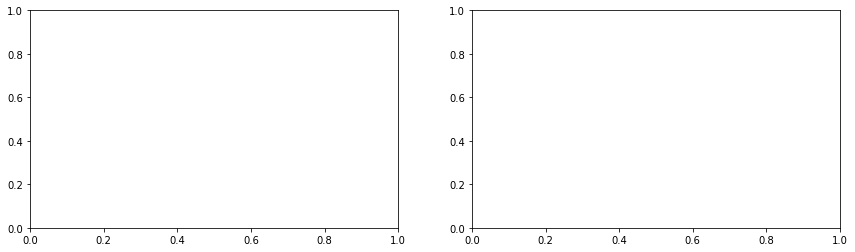

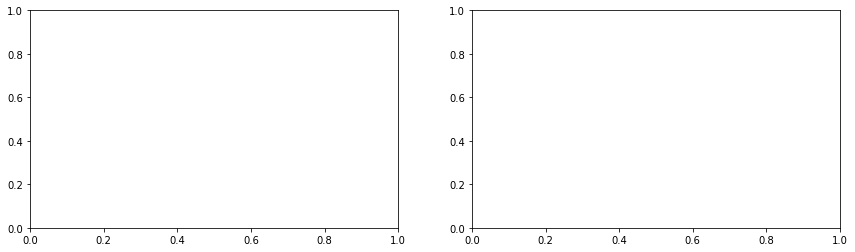

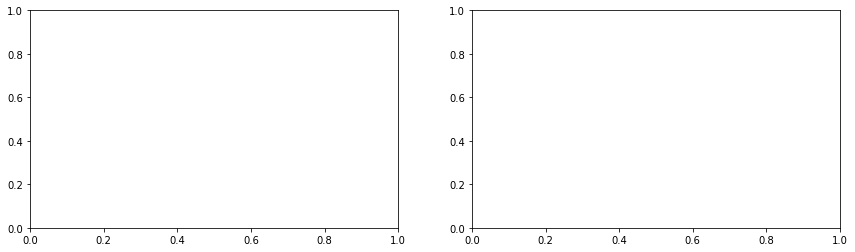

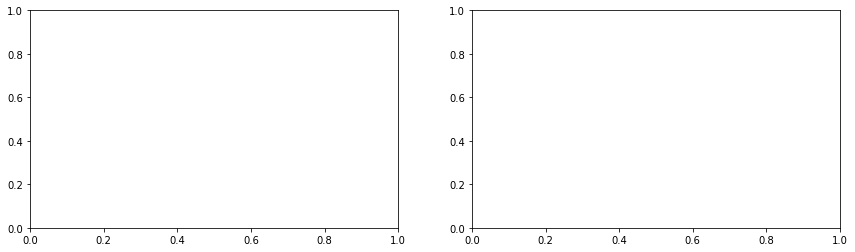

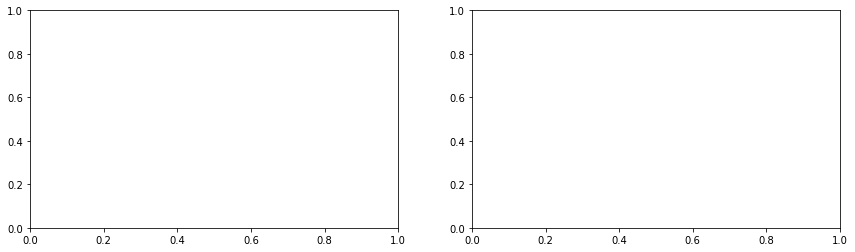

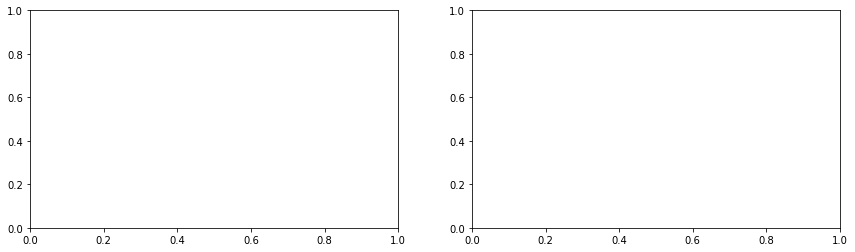

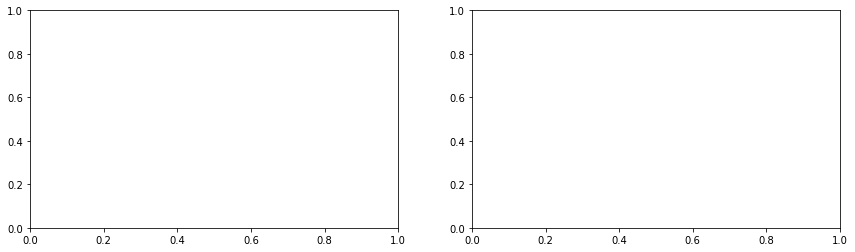

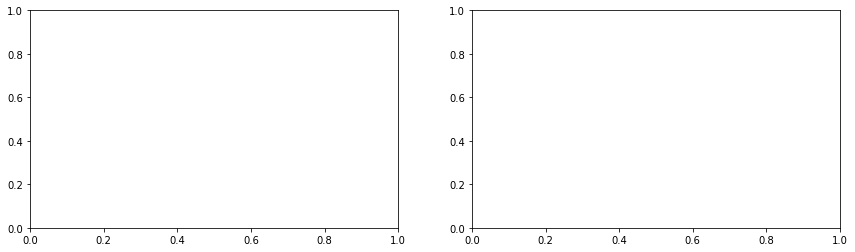

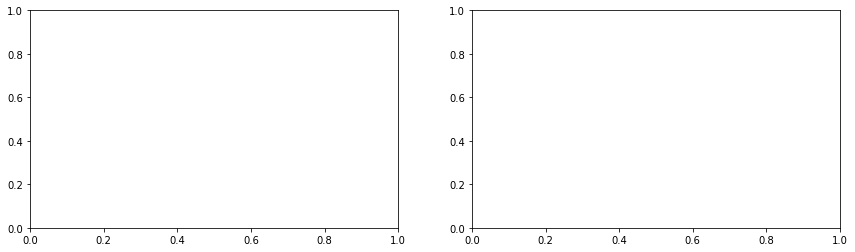

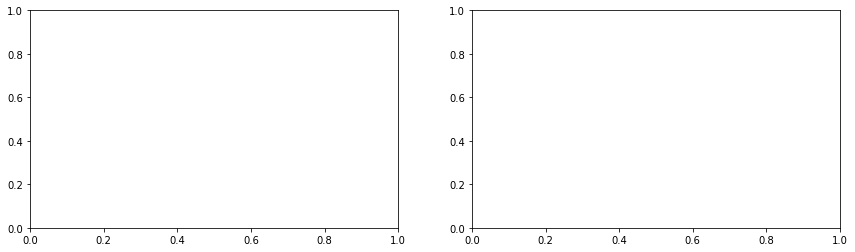

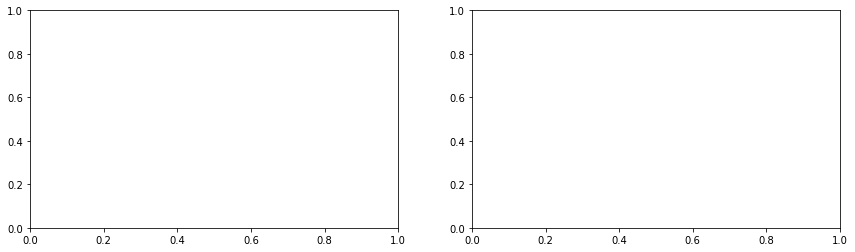

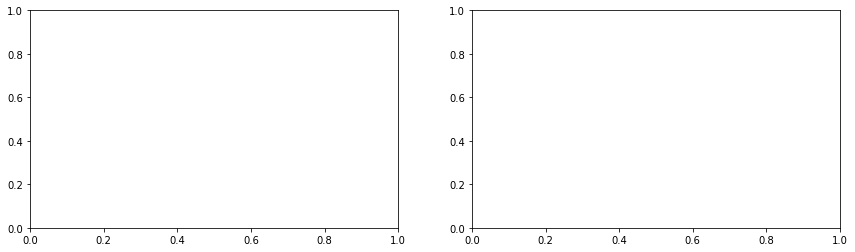

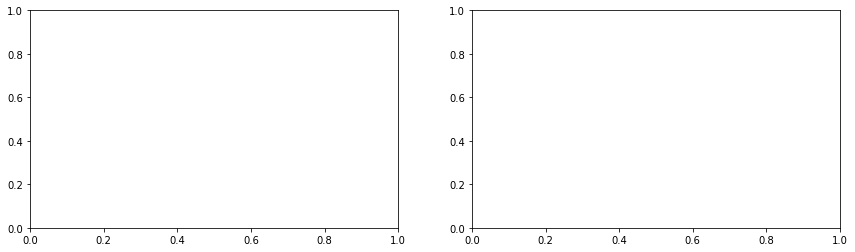

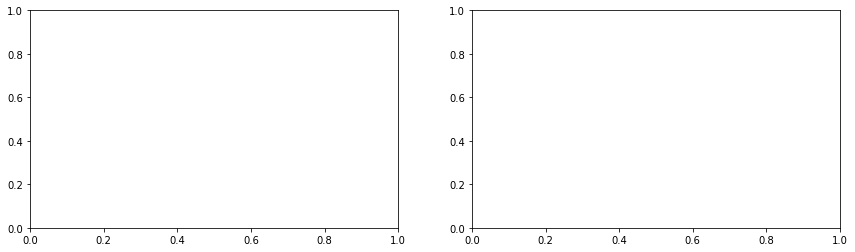

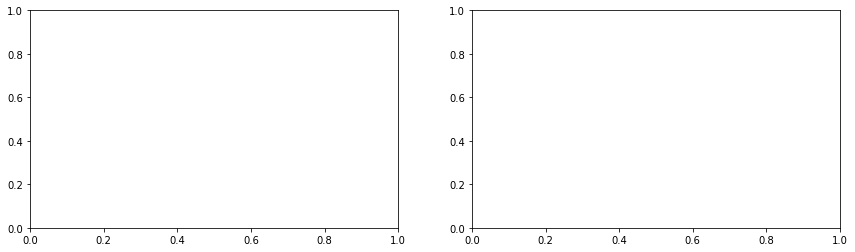

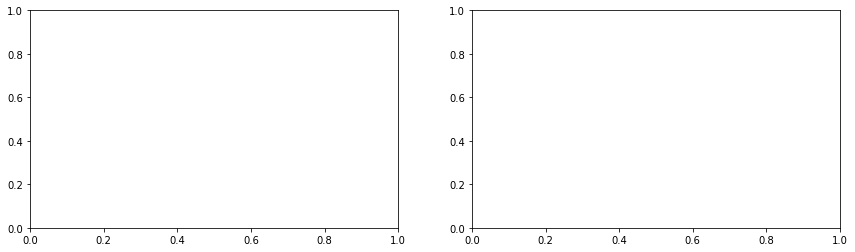

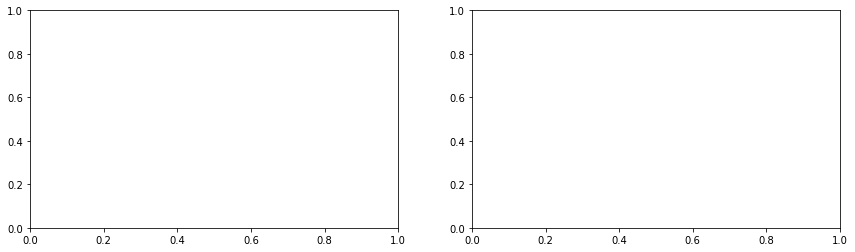

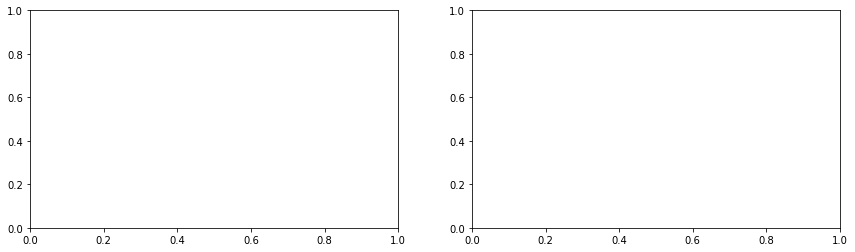

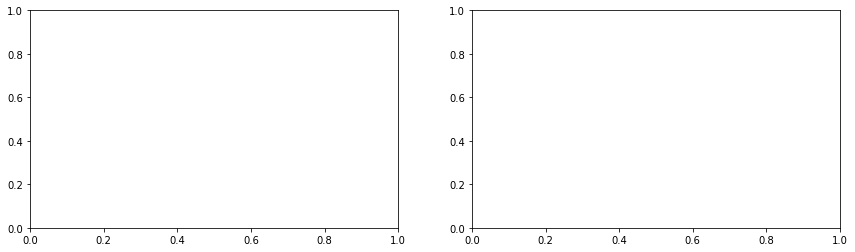

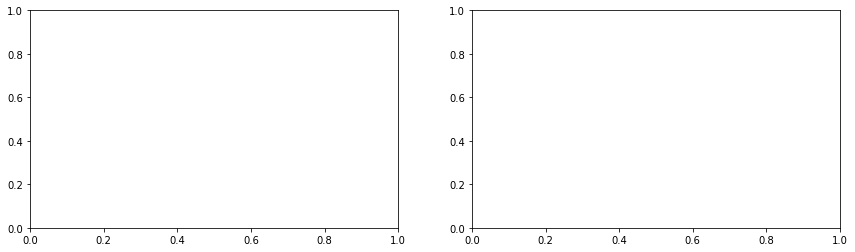

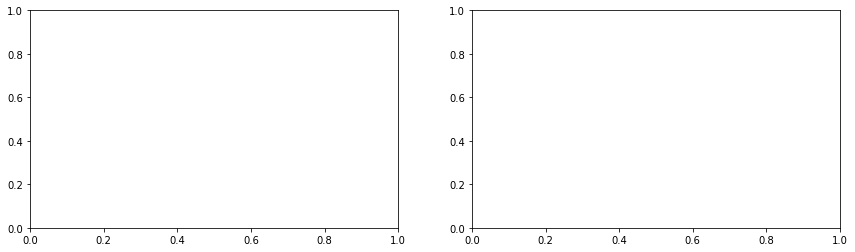

In [18]:
for attr in X.columns:
    #Format subplots
    fig, ax = plt.subplots(1,2)
    plt.subplots_adjust(right=2)
    
    #Construct values to count in each column
    a=set(X[X['stalk-root']=='?'][attr])
    b=set(X[X['stalk-root']!='?'][attr])
    print("a = {}".format(a))
    print("b = {}".format(b))
    c = a.union(b)
    print("c = {}".format(c))
    c = np.sort(np.array(list(c)))